## Purpose

Purpose of the notebook is to deep dive into the impact of setting class weights 
in an SVM algorithm.This is typically used when classes are imbalanced.

The code is based on the [sklearn example.](https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane_unbalanced.html)
It has been updated to depict both sides of hyperplane as well as support vectors identified by the algorithm.


In [46]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import random
from sklearn import svm

## Functions

In [47]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

To understand the behaviour of the hyperplanes, let us plot the hyperplanes

### Define Hyperplane

Decision rule : $$ y = \vec{w}\vec{x} + b $$
for positive support vector decision boundary $$ \vec{w}\vec{x} + b = 1 $$
for negative support vector decision boundary $$ \vec{w}\vec{x} + b = -1  $$
for decision boundary $$ \vec{w}\vec{x} + b = 0  $$

To draw the hyperplane, for a given point x, we need the corresponding y. So, consider $\vec{x}$ as $x_i$, $y_i$. $\vec{w}$ has 2 points $w_0$ and $w_1$.

Let v be the value to be subtituted. Rewriting equation above,

$$ v = w_0.x_i + w_1.y_i + b $$
$$ y_i = \frac{v - w_0.x_i - b}{w_1} $$



In [51]:
# Reference : https://pythonprogramming.net/predictions-svm-machine-learning-tutorial/
def hyperplane(x,w,b,v):
    # v = (w.x+b)
    return (-w[0]*x-b+v) / w[1]

## Insights

With weights, svm is able to categorize more minority classes correctly.

Test accuracy and test f1 score?




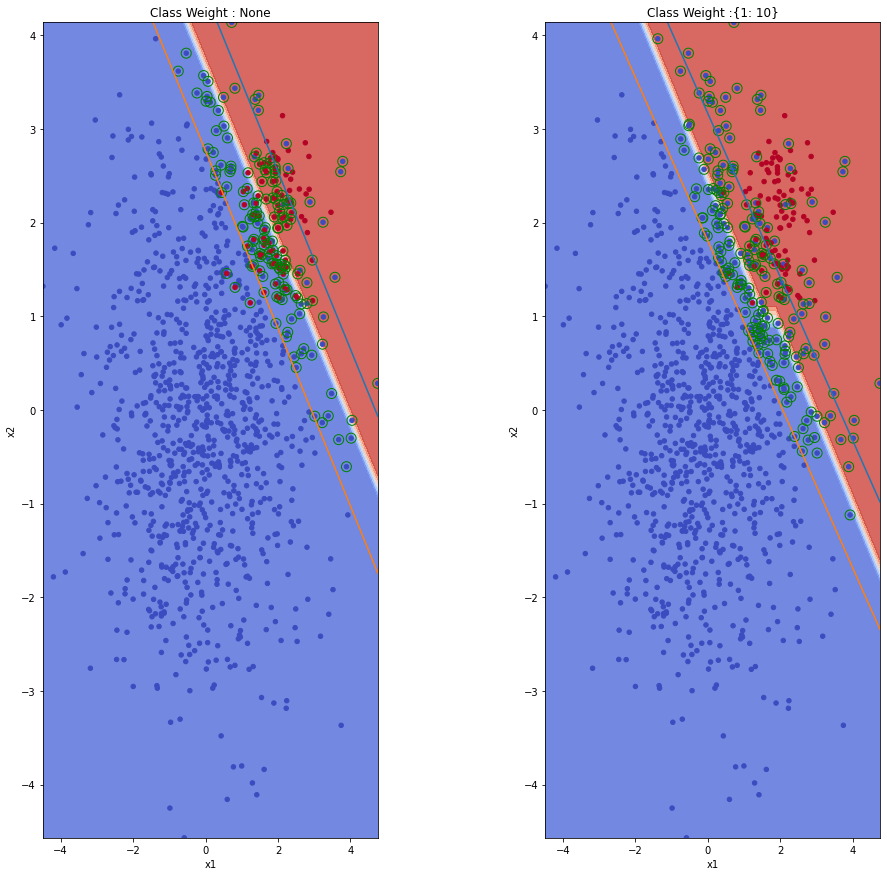

In [60]:
from sklearn.datasets import make_blobs

parameters = {'class_weight':[None, {1 : 10}] }

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(1, 2, figsize=(15, 15))
plt.subplots_adjust(wspace=.5, hspace=.5)

# we create two clusters of random points
n_samples_1 = 1000
n_samples_2 = 100
centers = [[0.0, 0.0], [2.0, 2.0]]
clusters_std = [1.5, 0.5]
X, y = make_blobs(n_samples=[n_samples_1, n_samples_2],
                  centers=centers,
                  cluster_std=clusters_std,
                  random_state=0, shuffle=False)

# create grid to evaluate model
xx = np.linspace(min(X[:, 0]), max(X[:, 0]), 30)
yy = np.linspace(min(X[:, 1]), max(X[:, 1]), 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T


for param, ax in zip(parameters['class_weight'], sub.flatten()):

    clf = svm.SVC(kernel = 'linear', class_weight = param)
    clf.fit(X,y)
    
    if param is None:
        title = 'Non Weighted'
    else:
        title = 'Class Weight :' + str(param)
    
    plot_contours(ax, clf, XX, YY,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X[:, 0],
               X[:, 1],
               c=y,
               cmap=plt.cm.coolwarm,
               s=20)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_title(title)
    
    x_line = np.linspace(0,8,9)
    psv1 = hyperplane(xx.min(),clf.coef_[0],clf.intercept_,1)
    psv2 = hyperplane(xx.max(),clf.coef_[0],clf.intercept_,1)
    ax.plot([xx.min(), xx.max()], [psv1, psv2])

    nsv1 = hyperplane(xx.min(),clf.coef_[0],clf.intercept_,-1)
    nsv2 = hyperplane(xx.max(),clf.coef_[0],clf.intercept_,-1)
    ax.plot([xx.min(),xx.max()], [nsv1, nsv2])
    
    ax.scatter(clf.support_vectors_[:, 0], 
               clf.support_vectors_[:, 1], 
               s=100,          
               linewidth=1, 
               facecolors='none', 
               edgecolors='green')

plt.show()
    


There are a few points far out on the red section that are misclassified points. They are still classified as support vectors by the algorithm as per the discussions in 02_Effect_Of_C_Regularization.ipynb